<a href="https://colab.research.google.com/github/JefteLG/Twitter_Sentiment_Analysis/blob/main/Notebooks/1_Primeira_Solucao/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><strong>Twitter Sentiment Analysis<strong><h1></center>

O objetivo desse estudo de caso é criar um modelo que analisa um ou mais Tweets para prever o sentimento(Positivo ou Negativo) presente em cada Tweet. É usado o Processamento de linguagem natural(NLP) juntamente com aprendizagem de maquina para construir esse modelo.

# Testes

In [ ]:
luska = 'quero @user remover o @user agora'

In [ ]:
newtext = [word for word in luska.split()]


In [ ]:
#Baixar os dados
!wget --no-check-certificate \
    https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/twitter.csv \
    -O /tmp/twitter.csv

--2021-01-22 22:37:09--  https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/twitter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘/tmp/twitter.csv’

/tmp/twitter.csv    100%[===================>]   2.96M  12.7MB/s    in 0.2s    

2021-01-22 22:37:09 (12.7 MB/s) - ‘/tmp/twitter.csv’ saved [3103165/3103165]



In [ ]:
tweets_df = pd.read_csv('/tmp/twitter.csv')
tweets_df

In [ ]:
tweet = tweets_df[tweets_df['id']==4]['tweet'].iloc[0]
tweet

In [ ]:
!pip install demoji
import demoji as em

em.download_codes()

In [ ]:
text = 'Olá 😀'

em.findall(text)

In [ ]:
from pprint import pprint
seq = "I bet you didn't know that 😀, 🙋‍♂️, and 🙋‍♀️ are three different emojis."
pprint(seq.encode('unicode-escape'))

**TESTE2**

In [ ]:
import re
import string

text1="O Zyoo não é o 'melhor' do mundo"
text2='Eu não gosto de "jogar" futebol'

limpar_aspas_simples="'"
limpar_aspas_duplas='"'

textfim1 = re.sub(limpar_aspas_simples,' ', text1)
textfim2 = re.sub(limpar_aspas_duplas,' ', text2)

print(textfim1)
print(textfim2)



O Zyoo não é o  melhor  do mundo
Eu não gosto de  jogar  futebol


**TESTE3**

In [ ]:
compare_list = "FB needs to hurry up and add a laugh/cry button 😬😭😓🤢🙄😱 Since eating my feelings has not fixed the world's problems."

from nltk.tokenize import RegexpTokenizer
match_tokenizer = RegexpTokenizer("[\w']+")
# match_tokens = [sent for sent in compare_list]
match_tokens = []

for sent in compare_list:   
    match_tokens.append(match_tokenizer.tokenize(sent))

print(match_tokens)

[['F'], ['B'], [], ['n'], ['e'], ['e'], ['d'], ['s'], [], ['t'], ['o'], [], ['h'], ['u'], ['r'], ['r'], ['y'], [], ['u'], ['p'], [], ['a'], ['n'], ['d'], [], ['a'], ['d'], ['d'], [], ['a'], [], ['l'], ['a'], ['u'], ['g'], ['h'], [], ['c'], ['r'], ['y'], [], ['b'], ['u'], ['t'], ['t'], ['o'], ['n'], [], [], [], [], [], [], [], [], ['S'], ['i'], ['n'], ['c'], ['e'], [], ['e'], ['a'], ['t'], ['i'], ['n'], ['g'], [], ['m'], ['y'], [], ['f'], ['e'], ['e'], ['l'], ['i'], ['n'], ['g'], ['s'], [], ['h'], ['a'], ['s'], [], ['n'], ['o'], ['t'], [], ['f'], ['i'], ['x'], ['e'], ['d'], [], ['t'], ['h'], ['e'], [], ['w'], ['o'], ['r'], ['l'], ['d'], ["'"], ['s'], [], ['p'], ['r'], ['o'], ['b'], ['l'], ['e'], ['m'], ['s'], []]


# Estrutura do Projeto
O projeto prático de Análise de sentimento do Twitter é dividido nas seguintes tarefas:

- Tarefa nº 1: Entender a Declaração do Problema e o caso de negócios.
- Tarefa nº 2: Importar bibliotecas e conjuntos de dados.
- Tarefa nº 3: Executar a análise exploratória de dados.
- Tarefa nº 4: Plotar a nuvem de palavras.
- Tarefa nº 5: Executar a limpeza de dados - remover pontuação.
- Tarefa nº 6: Executar a limpeza de dados - remover palavras de parada(stop words).
- Tarefa nº 7: Executar vetorização de contagem (Tokenization).
- Tarefa nº 8: Criar um pipeline para remover palavras irrelevantes, pontuação e realizar tokenização.
- Tarefa nº 9: Treinar um Classificador Naive Bayes.
- Tarefa nº 10: Avaliar o desempenho do modelo treinado.

## Tarefa nº 1: Entender a Declaração do Problema e o caso de negócios

- Nesse notebook é usado o Processamento de linguagem natural(NLP) juntamente com aprendizagem de maquina para construir um modelo que analisa milhares de Tweets para prever o sentimentos das pessoas.

- A Inteligencia artificial e a analise de sentimentos baseadas em aprendizado de maquina é crucial para empresas, visto que, os insight revelado pela analise visa indicar o grau de qualidade dos serviços e/ou produtos da empresa de acordo com os clientes.(Trabalhos Futuros)

- Esse projeto é diretamente aplicavél a praticamente qualquer empresa que disponhe de meios onlines(Twitter, Instagran, Facebook, WebSite) para interagir com seus clientes.(Trabalhos Futuros)

- Os algoritmos podem ser usados para detectar e possivelmente sinalizar autamaticamente tweets de odio e racismo.(Trabalhos Futuros)

## Tarefa nº 2: Importar bibliotecas e conjuntos de dados

In [ ]:
#Pacotes essenciais para analise numericas, manipulação de data frames e visualização de dados.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Pacote para a criação de nuuvens de palavras na tarefa nº 4
!pip install WordCloud
from wordcloud import WordCloud

In [ ]:
# A base de dados desse exemplo está no meu repositorio do github e pode ser baixada no link abaixo.
!wget --no-check-certificate \
    https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/data_base_estudos/twitter.csv \
    -O /tmp/twitter.csv

--2021-02-02 12:58:04--  https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/data_base_estudos/twitter.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘/tmp/twitter.csv’

/tmp/twitter.csv    100%[===================>]   2.96M  --.-KB/s    in 0.1s    

2021-02-02 12:58:05 (23.7 MB/s) - ‘/tmp/twitter.csv’ saved [3103165/3103165]



In [ ]:
# Utilizando o pandas para ler o arquivo CSV e estrutura-lo em um data frame na variavel `tweets_df` por meio do metodo read_csv().
tweets_df = pd.read_csv('/tmp/twitter.csv')

In [ ]:
# visualização1.
tweets_df.head()

In [ ]:
# visualização2.
tweets_df

In [ ]:
# Informações sobre a quantidade de Tweets, memoria, tipo de dados e dados faltantes.
tweets_df.info()

In [ ]:
# Exclusão da coluna `id`, não é um dado relevante para o modelo.
# tweets_df = tweets_df.drop(columns=['id'], axis=1)

## Tarefa nº 3: Executar a análise exploratória de dados.

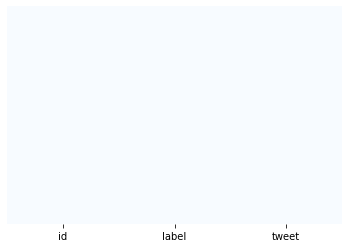

In [ ]:
# Esta é uma função no nível dos eixos e desenhará o mapa de calor para os eixos ativos no momento. Nesse caso a função verifica se existe dados faltantes.
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [ ]:
# O método sns.countplot() é usado para mostrar as contagens de observações em cada categoria categórica usando barras(Histograma).
sns.countplot(data=tweets_df, x='label', palette='Set2')
plt.show()

# sns.countplot(tweets_df['label'], label='Count', palette='Set2')
# plt.show()

In [ ]:
# Nova coluna com o tamanho dos tweets
tweets_df['length'] = tweets_df['tweet'].apply(len)

**Teste**

In [ ]:
from nltk.tokenize import TweetTokenizer

In [ ]:
tweets_df[tweets_df['id']==31958]['tweet'].iloc[0]

In [ ]:
tweetTK = TweetTokenizer()

In [ ]:
tweetTK.tokenize(tweets_df[tweets_df['id']==31958]['tweet'].iloc[0])

**Fim Teste**

In [ ]:
# Descobrir o tamanho maximo, minimo e medio dos tweets.
tweets_df['length'].plot(bins=100, kind='hist', figsize=(12,8), color='g')

tweets_df.describe()

In [ ]:
# Selecionar a menor frase
tweets_df[tweets_df['length']==11]['tweet'].iloc[0]

In [ ]:
# Separa o DataFrame em dois Dataframes, um com sentimentos positivos e o outro com sentimentos negativos.
positive_df = tweets_df[tweets_df['label']==0]
negative_df = tweets_df[tweets_df['label']==1]

In [ ]:
positive_df

In [ ]:
negative_df

## Tarefa nº 4: Plotar a nuvem de palavras

In [ ]:
# Criar uma lista de tweets
sentences = tweets_df['tweet'].tolist()

In [ ]:
# O método join() pega todos os itens em um iterável e os une em uma string. é usado o espaço como separador
sentences_as_one_string = " ".join(sentences)

In [ ]:
# Nuvem de palavras de todos os tweets
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
# Nuvem de palavras de todos os tweets NEGATIVOS
negative_sentences = negative_df['tweet'].tolist()
negative_as_one_string = " ".join(negative_sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_as_one_string))

In [ ]:
# Nuvem de palavras de todos os tweets POSITIVOS
positive_sentences = positive_df['tweet'].tolist()
positive_as_one_string = " ".join(positive_sentences)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_as_one_string))

## Tarefa nº 5: Executar a limpeza de dados - remover pontuação

In [ ]:
import string

In [ ]:
text = 'Good morning beautiful people :)... I am having fun learning Machine learning and artificial intelligence'

[Artigo sobre a remoção de pontuações de uma string](https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb)

### Metodo #1

#### Metodo #1.1

In [ ]:
test_punc_remove = [char for char in text if char not in string.punctuation]

In [ ]:
test_punc_remove

In [ ]:
test_punc_remove = ''.join(test_punc_remove)

In [ ]:
test_punc_remove

#### Metodo #1.2

In [ ]:
text_remove_punct = []

In [ ]:
for char in text:
  if char not in string.punctuation:
    text_remove_punct.append(char)

new_text = ''.join(text_remove_punct)

In [ ]:
new_text

### Metodo #2

In [ ]:
punct = string.punctuation + string.digits  

In [ ]:
table_tst = str.maketrans('','',punct)
newtext = text.translate(table_tst)

In [ ]:
newtext

### Metodo #3

In [ ]:
punct = string.punctuation + string.digits  

In [ ]:
table_ = str.maketrans(punct, ' '*len(punct))
newtext = ' '.join(text.translate(table_).split())

In [ ]:
newtext

### Metodo #4

In [ ]:
punct = string.punctuation + string.digits  

In [ ]:
for s in punct:
  text = text.replace(s, '')

In [ ]:
text

### Metodo #5

In [ ]:
import re
newtext = re.sub(r'[^A-Za-z]+', ' ', text)

In [ ]:
newtext

'Good morning beautiful people I am having fun learning Machine learning and artificial intelligence'

## Tarefa nº 6: Executar a limpeza de dados - remover palavras de parada(stop words)

In [ ]:
# Pacotes para facilitar o processamento de linguagem natural
import nltk
import string

nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
text = 'Good morning beautiful people :)... I am having fun learning Machine learning and artificial intelligence in 2020'

# caracteres para remover
puncts = string.digits + string.punctuation

In [ ]:
# remoção de caracteres
text_remove_punct = [char for char in text if char not in puncts]

In [ ]:
# pega todos os itens em um iterável e os une em uma string.
text_remove_punct = ''.join(text_remove_punct)

In [ ]:
text_remove_punct

In [ ]:
# remoção de stopword
text_remove_stopword = [word for word in text_remove_punct.split() if word.lower() not in stopwords.words('english')]

In [ ]:
text_remove_stopword 

**Pipeline remover pontuaçoes e stopwords**

In [ ]:
def pipeline(text):
  # frase sem nenhuum tratamento
  print(text)
  # remover as pontuaçoes
  text_remove_punct = [char for char in text if char not in puncts]
  # unir todos os elemntos da lista
  text_remove_punct = ''.join(text_remove_punct)
  # frase com pontuações removidas
  print(text_remove_punct) 

  # remover as stopword
  text_remove_stopword = [word for word in text_remove_punct.split() if word.lower() not in stopwords.words('english')]
  text_remove_stopword = ' '.join(text_remove_stopword)
  # frase com stopwords removidas
  print(text_remove_stopword)

In [ ]:
pipeline(text)

## Tarefa nº 7: Executar vetorização de contagem(Tokenization)

Aprofundar:

[Feature Extraction from Text (USING PYTHON)](https://www.youtube.com/watch?v=7YacOe4XwhY&ab_channel=MachineLearningTV)

[Feature Extraction in Scikit Learn](https://www.youtube.com/watch?v=y_X4hXjTFNQ&ab_channel=DataTalks)

[NLP - Text Preprocessing and Text Classification (using Python)](https://www.youtube.com/watch?v=nxhCyeRR75Q&ab_channel=MachineLearningTV)

**Metodologia: Bag of Word**

In [ ]:
#Classe responsavel por Converter uma coleção de documentos de texto em uma matriz de contagens de tokens
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sample_data=[
             'Porcaria de produto',
             'Obrigado pelo retorno estou muito satisfeito com seu trabalho?',
             'Voces ainda vão me responder?',
             'O pior serviço de atendimento de todos!!!'
             ]

sample_data2=[
              'Hello World',
              'Hello Hello hello World',
              'Hello World world world'
              ]

In [ ]:
# Aprender o vocabulario do texto e retornar um array, [n_samples, n_features]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)
print(vectorizer.get_feature_names())

In [ ]:
# versao tokenizada das strings no dataset
# (id palavra, id frase)  frequencia da palavra na frase 
c = X
print(c)

In [ ]:
print(vectorizer.vocabulary_)

{'porcaria': 11, 'de': 4, 'produto': 12, 'barato': 2, 'ruim': 15, 'obrigado': 8, 'pelo': 9, 'retorno': 14, 'estou': 5, 'muito': 7, 'satisfeito': 16, 'com': 3, 'seu': 18, 'trabalho': 20, 'voces': 21, 'ainda': 0, 'vão': 22, 'me': 6, 'responder': 13, 'pior': 10, 'serviço': 17, 'atendimento': 1, 'todos': 19}


In [ ]:
#Retorne uma representação densa desta matriz.
print(X.toarray())

## Tarefa nº 8: Criar um pipeline para remover palavras irrelevantes, pontuação e realizar tokenização

In [ ]:
import pandas as pd
import string as st
import nltk

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Baixar os dados

# data set
!wget --no-check-certificate \
  https://raw.githubusercontent.com/JefteLG/Twitter_Sentiment_Analysis/main/Data_Set/data_base_estudos/twitter.csv \
  -O /tmp/twitter.csv

# stop word
nltk.download('stopwords')

In [ ]:
# ler os dados
msg_tweet_df = pd.read_csv('/tmp/twitter.csv')

# remover digitos e pontuações
# char_remove = st.digits + st.punctuation
char_remove = st.punctuation

In [ ]:
# limpar as menssagens
def message_cleaning(msg):

  # remoção das pontuações
  text_remove_punct = [char for char in msg if char not in char_remove]
  text_remove_punct = ''.join(text_remove_punct)

  # remoção das palavras de parada
  text_remove_stopword = [word for word in text_remove_punct.split() if word.lower() not in stopwords.words('english')]
  # text_remove_stopword = ' '.join(text_remove_stopword)
  return text_remove_stopword

In [ ]:
# aplica a função para limpar as mensagens para cada tweet da serie
tweet = msg_tweet_df['tweet'].apply(message_cleaning)

In [ ]:
type(tweet)

In [ ]:
tweet

In [ ]:
# tweet especifico pré limpeza
print(tweet[0])

In [ ]:
# tweet especifico pós limpeza
print(msg_tweet_df['tweet'][0])

In [ ]:
#Realiza a Tokenização dos tweets utilizando a limpeza de mensagens primeiro
vectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(msg_tweet_df['tweet'])
# tweets_countvectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8').fit_transform(msg_tweet_df['tweet']).toarray()

In [ ]:
# po = tweets_countvectorizer.toarray()
po = tweets_countvectorizer
print(po)
# print(po[0][33370:33380])

In [ ]:
# informações sobre a tokrnização dos tweets 
type(tweets_countvectorizer)
tweets_countvectorizer.shape

In [ ]:
print(vectorizer.get_feature_names)

In [ ]:
print(tweets_countvectorizer.toarray())

In [ ]:
t =tweets_countvectorizer.toarray()
print(t[0][14500:14600])

In [ ]:
print(vectorizer.vocabulary_)

In [ ]:
# conjunto de tweets vetorizados em um array de presença e frequencia de palavras em uma frase
X = tweets_countvectorizer

In [ ]:
# conjunto de rotulos binarios para classificar a emoção(positivo, negetiva) para cada elemento do meu conjunto X
y = msg_tweet_df['label']

**TESTE**

In [ ]:
# limpar as menssagens
def message_cleaning(msg):

  # remoção das pontuações
  text_remove_punct = [char for char in msg if char not in char_remove]
  text_remove_punct = ''.join(text_remove_punct)

  # remoção das palavras de parada
  text_remove_stopword = [word for word in text_remove_punct.split() if word.lower() not in stopwords.words('english')]
  text_remove_stopword = ' '.join(text_remove_stopword)
  return text_remove_stopword

# aplica a função para limpar as mensagens para cada tweet da serie
tweet2 = msg_tweet_df['tweet'].apply(message_cleaning)

In [ ]:
#Realiza a Tokenização dos tweets utilizando a limpeza de mensagens primeiro
vectorizer = CountVectorizer(dtype='uint8')
tweets_countvectorizer = vectorizer.fit_transform(tweet2)
# tweets_countvectorizer = CountVectorizer(analyzer=message_cleaning, dtype='uint8').fit_transform(msg_tweet_df['tweet']).toarray()

In [ ]:
tweets_countvectorizer.shape

## Tarefa nº 9: Treinar um Classificador Naive Bayes

In [ ]:
X.shape

(31962, 47386)

In [ ]:
y.shape

(31962,)

In [ ]:
y

In [ ]:
# Separação dos dados de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# print(X_train)
ht = X_train.toarray()
print(ht[25568][41680])

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
# Utilização do algoritmo de Naive Bayes para o treinamento
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Tarefa nº 10: Avaliar o desempenho do modelo treinado

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns 

In [ ]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
cm
# sns.heatmap(cm, annot=True)

array([[5773,  185],
       [ 198,  237]])

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5958
           1       0.56      0.54      0.55       435

    accuracy                           0.94      6393
   macro avg       0.76      0.76      0.76      6393
weighted avg       0.94      0.94      0.94      6393

